In [1]:
#IMPORTING the required LIBRARIES
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split

In [2]:
#Reading the CSV file
df=pd.read_csv('Covid19_dailyreport_us.csv')

In [3]:
df.head()

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-05-21 02:32:54,32.3182,-86.9023,13052,522,NaN,12530.0,1,266.194321,164450.0,1493.0,3.999387,84000001,USA,3353.942386,11.438860
1,Alaska,US,2020-05-21 02:32:54,61.3707,-152.4044,401,10,352.0,39.0,2,54.815493,37045.0,NaN,2.493766,84000002,USA,5063.940017,NaN
2,American Samoa,US,2020-05-21 02:32:54,-14.2710,-170.1320,0,0,NaN,0.0,60,0.000000,124.0,NaN,NaN,16,ASM,222.857246,NaN
3,Arizona,US,2020-05-21 02:32:54,33.7298,-111.4312,14906,747,3773.0,10386.0,4,204.788838,165435.0,1792.0,5.011405,84000004,USA,2272.859351,12.022005
4,Arkansas,US,2020-05-21 02:32:54,34.9697,-92.3731,5003,107,3852.0,1044.0,5,165.782801,96258.0,535.0,2.138717,84000005,USA,3189.670370,10.693584


In [4]:
df.isnull().sum()

Province_State           0
Country_Region           0
Last_Update              0
Lat                      2
Long_                    2
Confirmed                0
Deaths                   0
Recovered               16
Active                   0
FIPS                     0
Incident_Rate            2
People_Tested            2
People_Hospitalized     25
Mortality_Rate           1
UID                      0
ISO3                     0
Testing_Rate             2
Hospitalization_Rate    25
dtype: int64

# As we can see our dataset is containing missing values/null values, now we will remove them.

# As 'Lat' & 'Long' is not relevant for our analysis, we will drop the columns. 

In [5]:
df.drop(['Lat','Long_'],axis=1,inplace=True)

In [6]:
df.head()

,Province_State,Country_Region,Last_Update,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-05-21 02:32:54,13052,522,NaN,12530.0,1,266.194321,164450.0,1493.0,3.999387,84000001,USA,3353.942386,11.438860
1,Alaska,US,2020-05-21 02:32:54,401,10,352.0,39.0,2,54.815493,37045.0,NaN,2.493766,84000002,USA,5063.940017,NaN
2,American Samoa,US,2020-05-21 02:32:54,0,0,NaN,0.0,60,0.000000,124.0,NaN,NaN,16,ASM,222.857246,NaN
3,Arizona,US,2020-05-21 02:32:54,14906,747,3773.0,10386.0,4,204.788838,165435.0,1792.0,5.011405,84000004,USA,2272.859351,12.022005
4,Arkansas,US,2020-05-21 02:32:54,5003,107,3852.0,1044.0,5,165.782801,96258.0,535.0,2.138717,84000005,USA,3189.670370,10.693584


In [7]:
#Now we will replace missing value -by using- Simple Imputer
from sklearn.impute import SimpleImputer
imp=SimpleImputer(missing_values=np.NaN,strategy='mean')
list=['Recovered','Incident_Rate','People_Tested','People_Hospitalized','Mortality_Rate','Hospitalization_Rate','Testing_Rate']
for c in list:
    df[c]=imp.fit_transform(df[[c]])


In [8]:
df.isnull().sum()

Province_State          0
Country_Region          0
Last_Update             0
Confirmed               0
Deaths                  0
Recovered               0
Active                  0
FIPS                    0
Incident_Rate           0
People_Tested           0
People_Hospitalized     0
Mortality_Rate          0
UID                     0
ISO3                    0
Testing_Rate            0
Hospitalization_Rate    0
dtype: int64

# Therefore we have successfully removed NULL values from our dataset.

<BarContainer object of 58 artists>

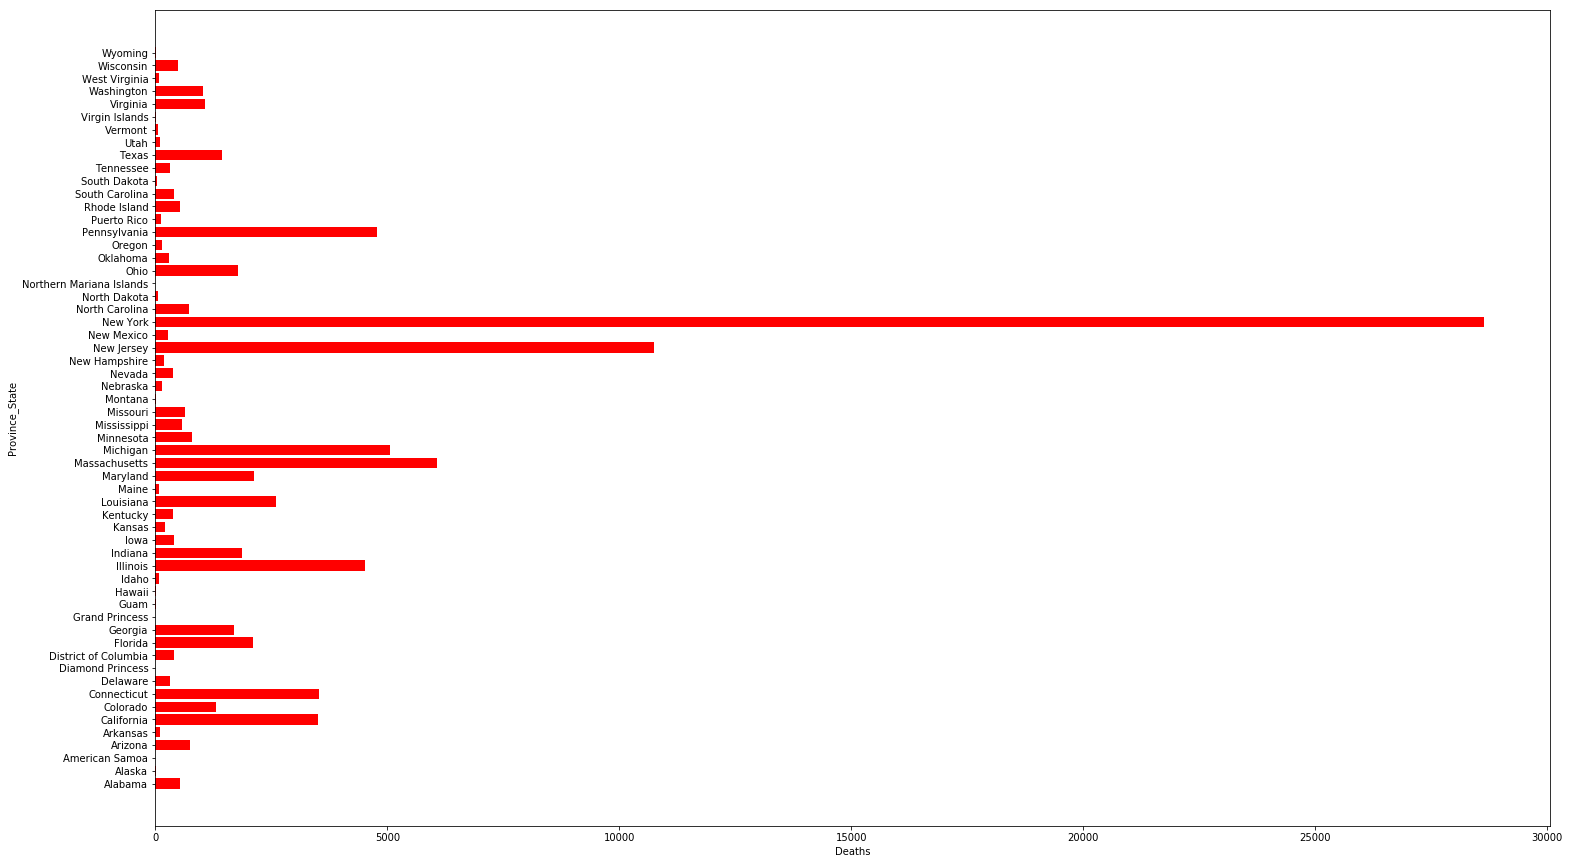

In [9]:
# PROVINCE_State v/s Deaths
plt.figure(figsize = (25, 15)) 
plt.xlabel('Deaths')
plt.ylabel('Province_State')
plt.barh(df['Province_State'],df['Deaths'],color='r')

# We clearly see that highest number of deaths are reported from New York(Province_State),i.e, NEWYORK is leading in Death cases

<BarContainer object of 58 artists>

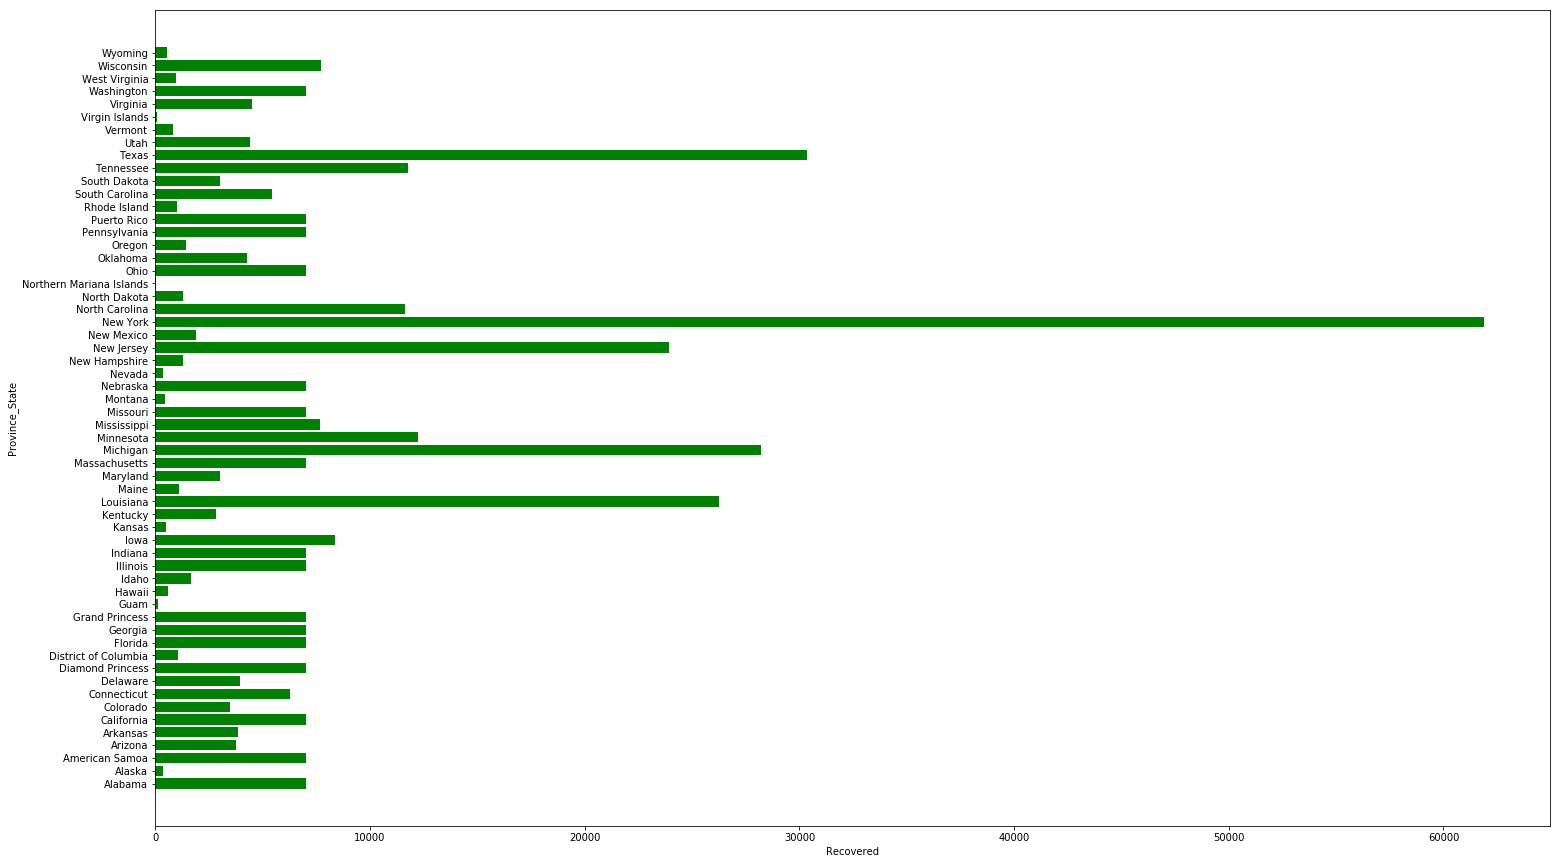

In [10]:
# PROVINCE_State v/s Recovered
plt.figure(figsize = (25, 15)) 
plt.xlabel('Recovered')
plt.ylabel('Province_State')
plt.barh(df['Province_State'],df['Recovered'],color='g')

# We can see that inspite of having highest no. of deaths reported from New York, it is still leading in case of no. of PEOPLE RECOVERED.

<BarContainer object of 58 artists>

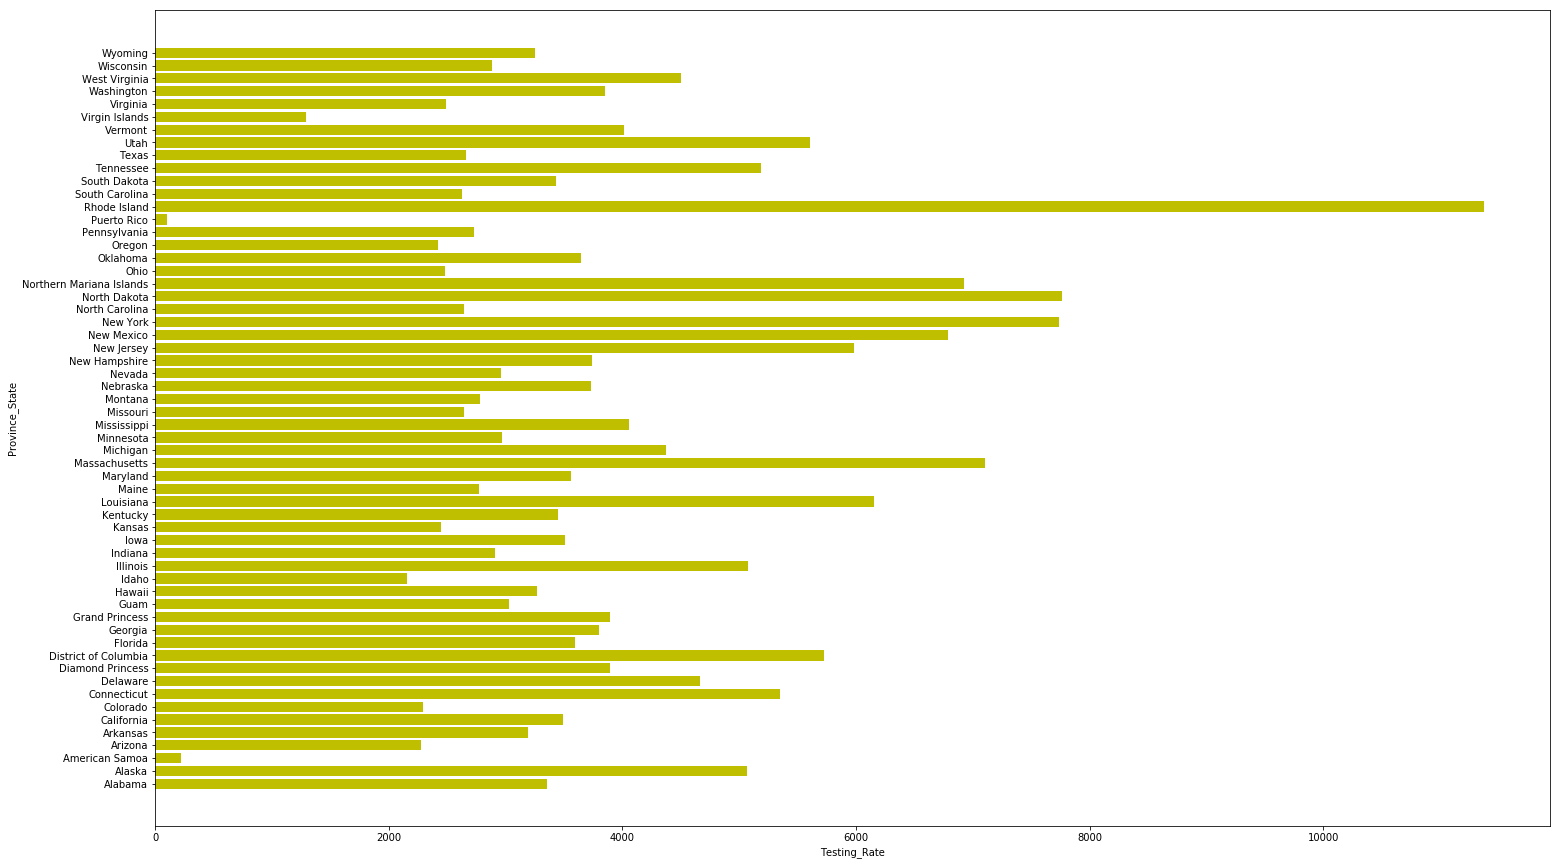

In [11]:
# PROVINCE_State v/s Testing Rate
plt.figure(figsize = (25, 15)) 
plt.xlabel('Testing_Rate')
plt.ylabel('Province_State')
plt.barh(df['Province_State'],df['Testing_Rate'],color='y')

# Rhode Island is having highest No. of TESTING_rate as compared to all other States.
-->Lowest TESTING rate are in states :-American Samoa & Puerto Rico. 

<BarContainer object of 58 artists>

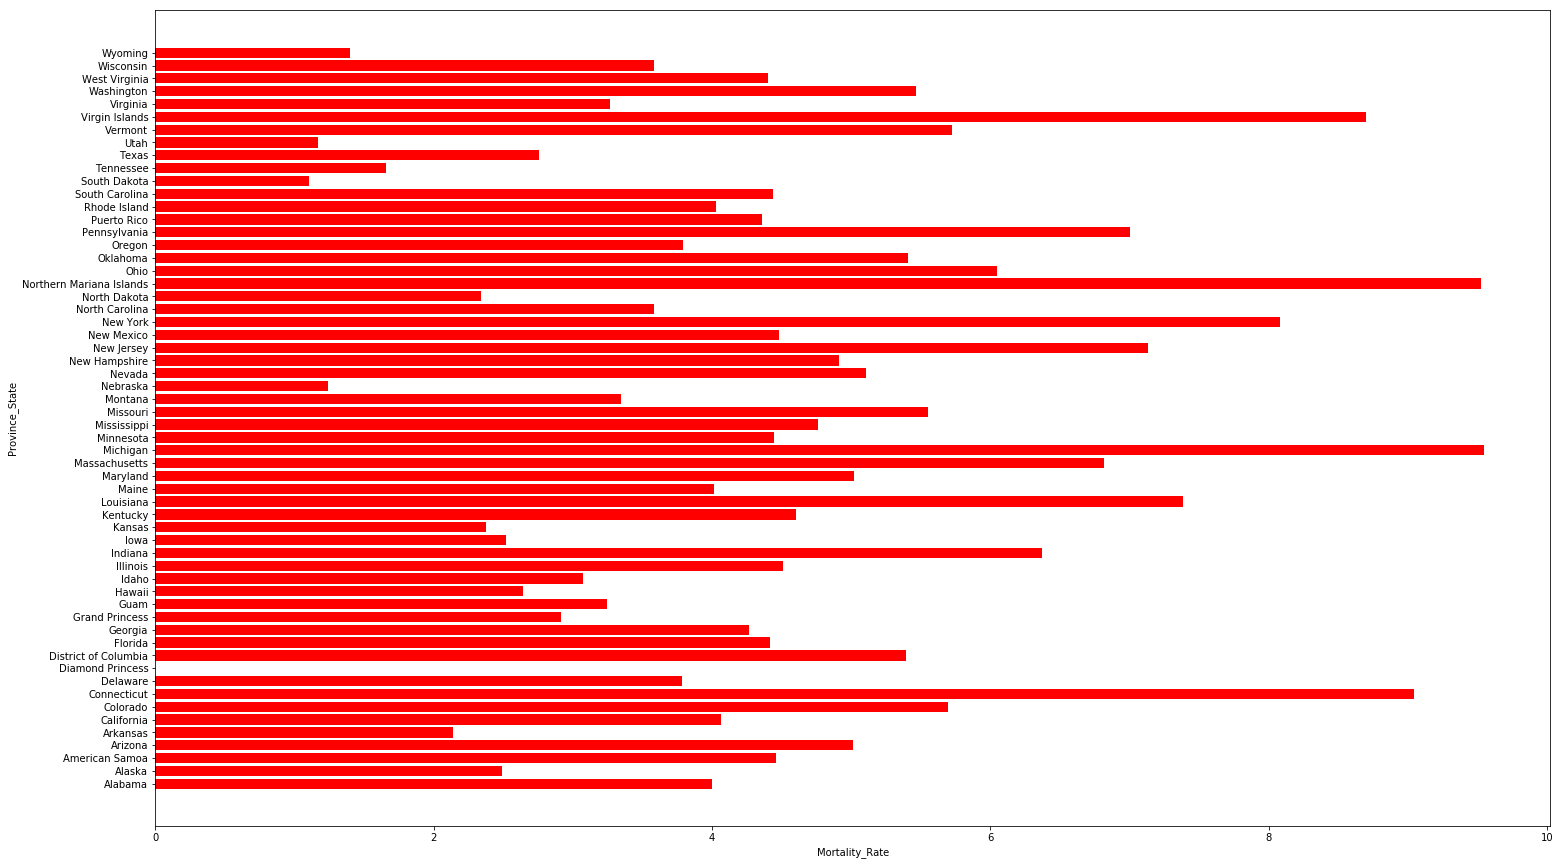

In [12]:
# PROVINCE_State v/s Mortality Rate
plt.figure(figsize = (25, 15)) 
plt.xlabel('Mortality_Rate')
plt.ylabel('Province_State')
plt.barh(df['Province_State'],df['Mortality_Rate'],color='r')

# 'Michigan' & 'Northern Mariana Islands' are having highest no. of MORTALITY RATE.

# 'Diamond Princess' is having almost 0 Mortality Rate.

<BarContainer object of 58 artists>

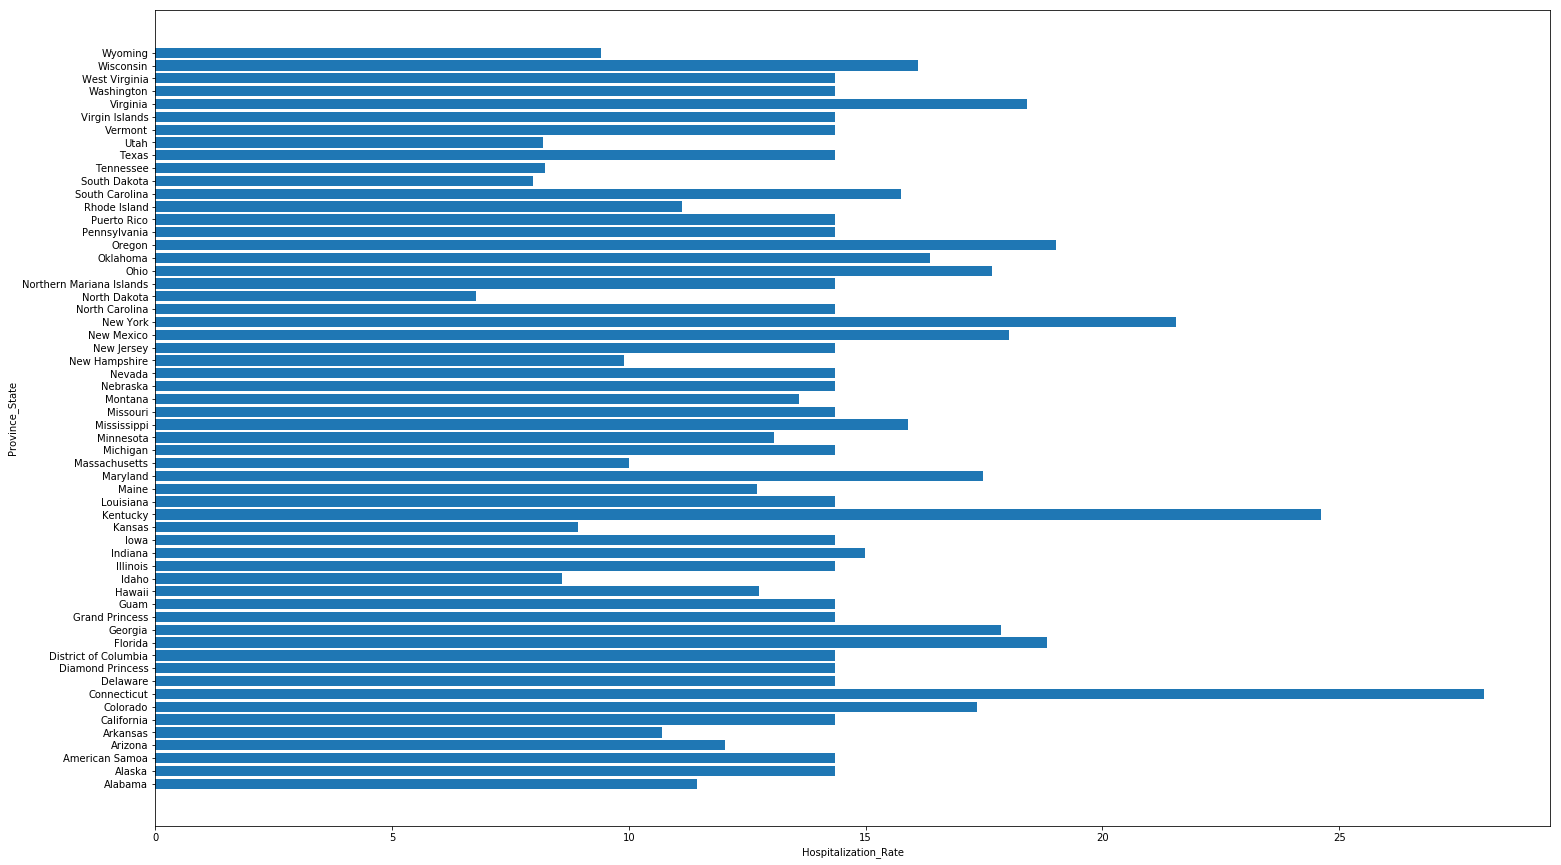

In [13]:
# PROVINCE_State v/s Hospitalization_Rate
plt.figure(figsize = (25, 15)) 
plt.xlabel('Hospitalization_Rate')
plt.ylabel('Province_State')
plt.barh(df['Province_State'],df['Hospitalization_Rate'])

# Highest No. of PEOPLE who were hospitalized are in CONNECTICUT(Province_State)

# Lowest No. of PEOPLE hospitalized are in North Dakota(Province_State)

<BarContainer object of 58 artists>

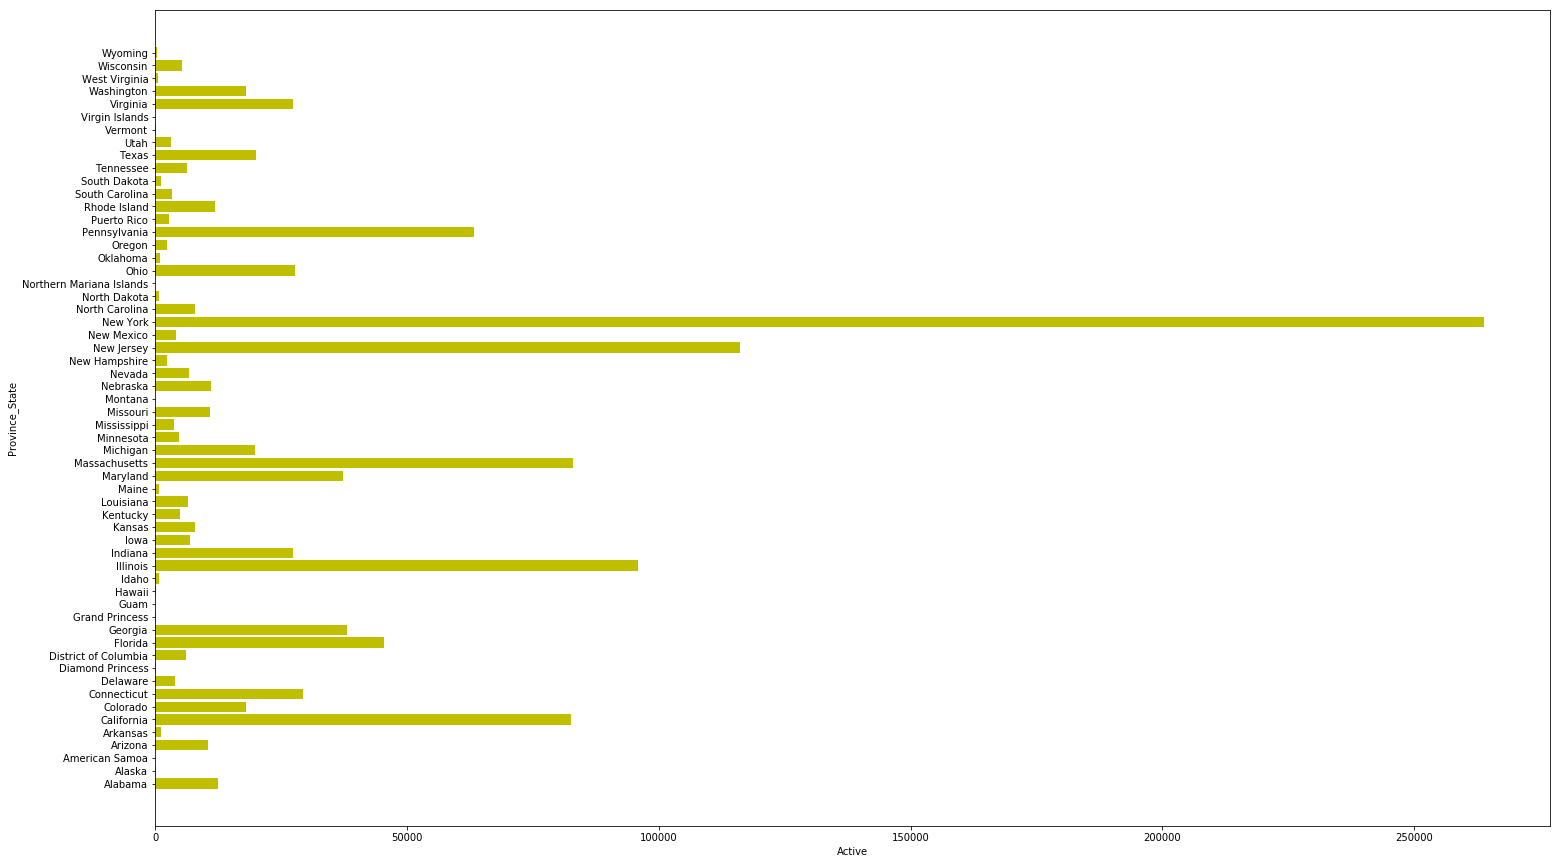

In [14]:
# PROVINCE_State v/s Active
plt.figure(figsize = (25, 15)) 
plt.xlabel('Active')
plt.ylabel('Province_State')
plt.barh(df['Province_State'],df['Active'],color='y')

# NEW York is having highest No. of active cases as compared to others.

<BarContainer object of 58 artists>

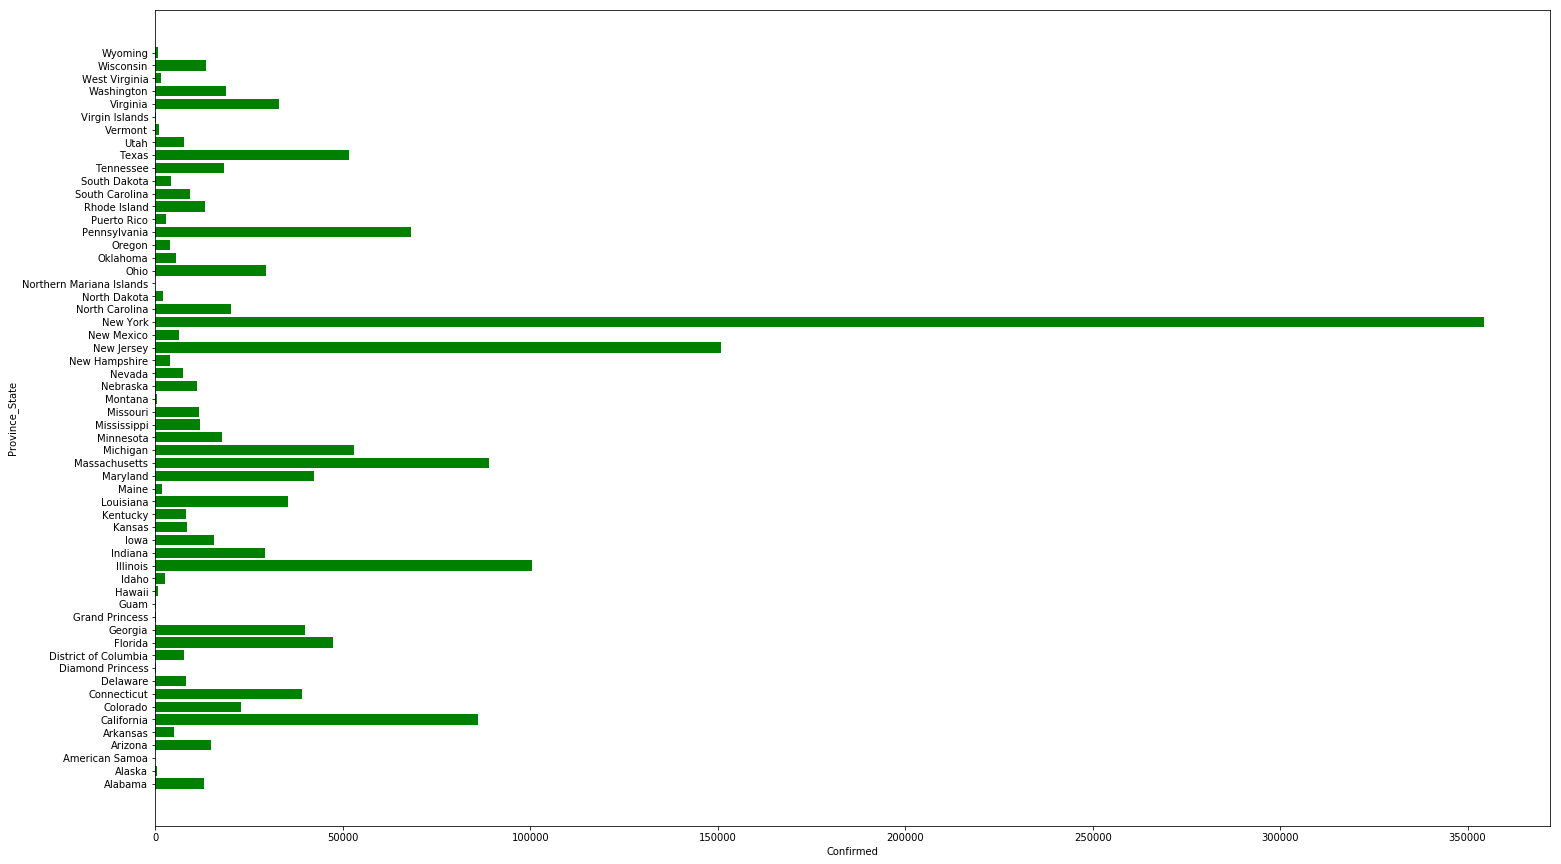

In [15]:
# PROVINCE_State v/s Confirmed
plt.figure(figsize = (25, 15)) 
plt.xlabel('Confirmed')
plt.ylabel('Province_State')
plt.barh(df['Province_State'],df['Confirmed'],color='g')

# Here also, New York is leading in 'Confirmed' cases.

<BarContainer object of 58 artists>

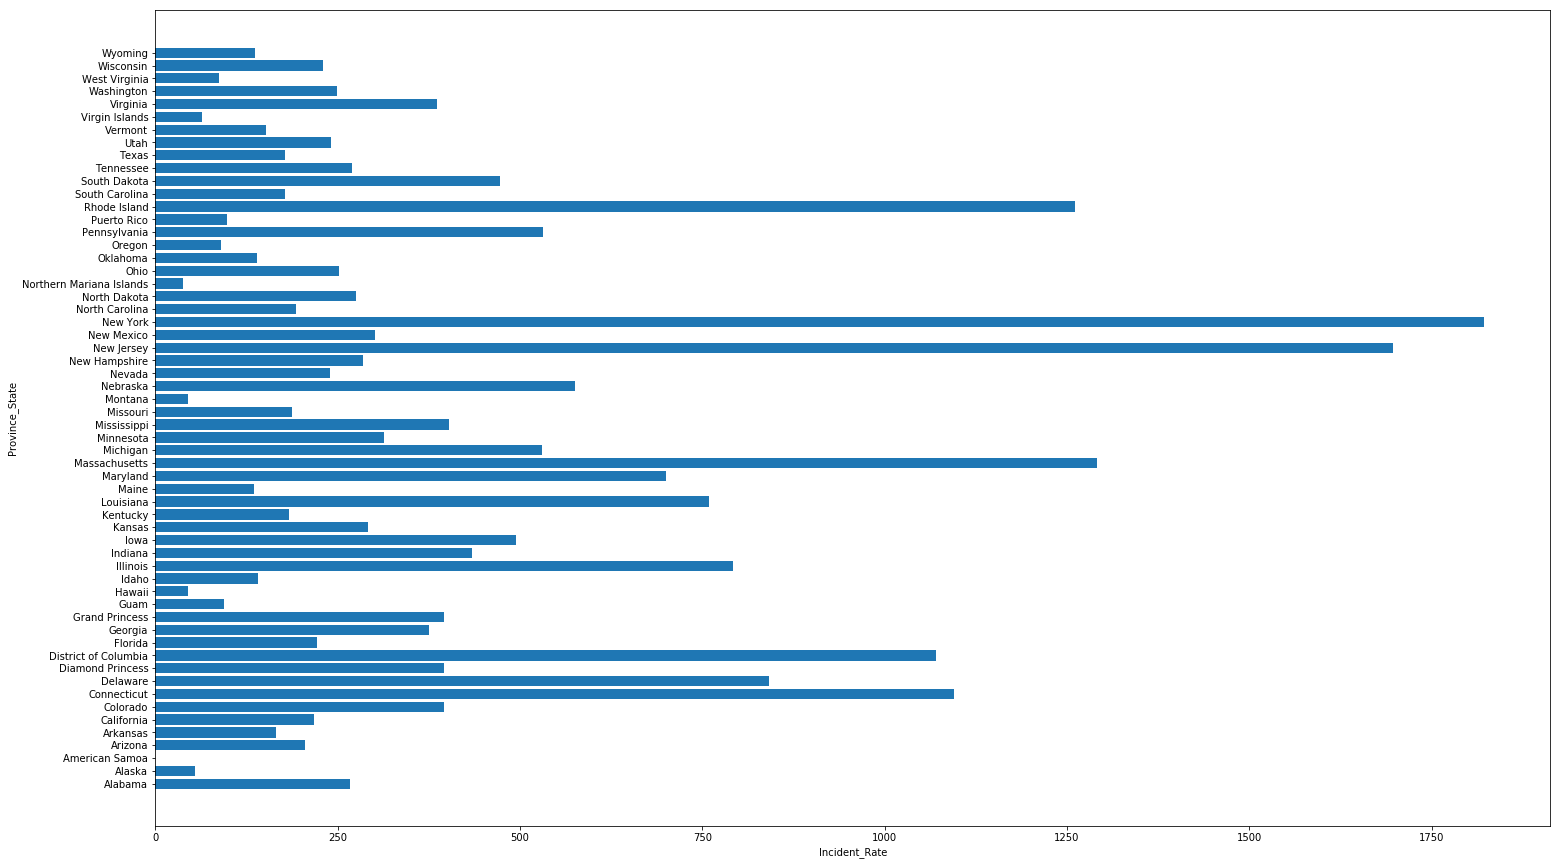

In [16]:
# PROVINCE_State v/s Incident rate
plt.figure(figsize = (25, 15)) 
plt.xlabel('Incident_Rate')
plt.ylabel('Province_State')
plt.barh(df['Province_State'],df['Incident_Rate'])

# Here also New York is leading, we can say that NEW YORK is the State that is HIGHLY affected by COVID-19.

<BarContainer object of 58 artists>

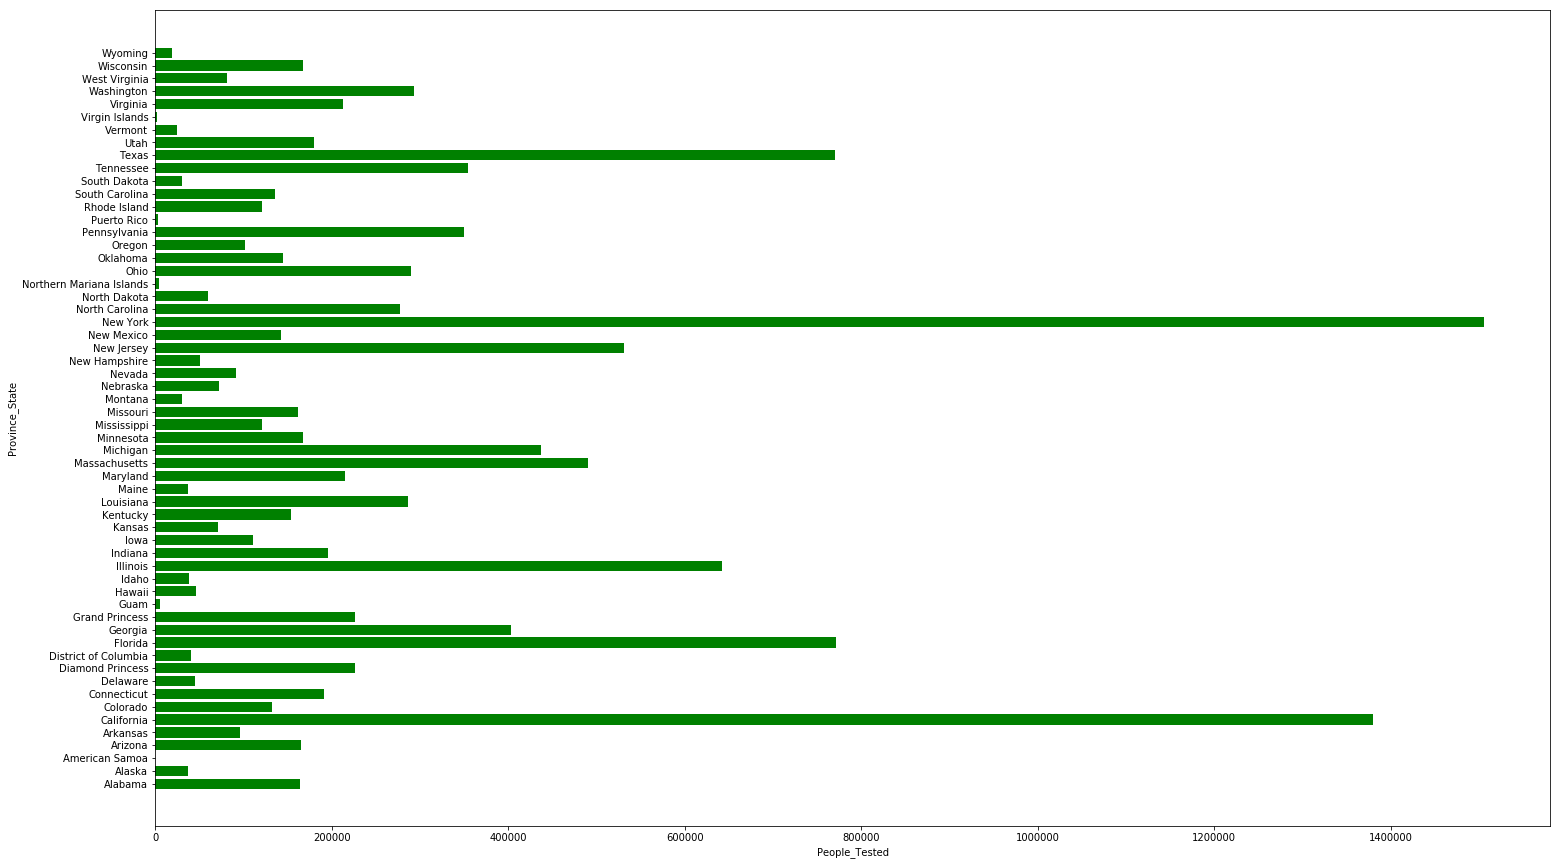

In [17]:
# PROVINCE_State v/s PEOPLE TESTED
plt.figure(figsize = (25, 15)) 
plt.xlabel('People_Tested')
plt.ylabel('Province_State')
plt.barh(df['Province_State'],df['People_Tested'],color='g')

# New York & California have the highest no. of people TESTED.

<BarContainer object of 58 artists>

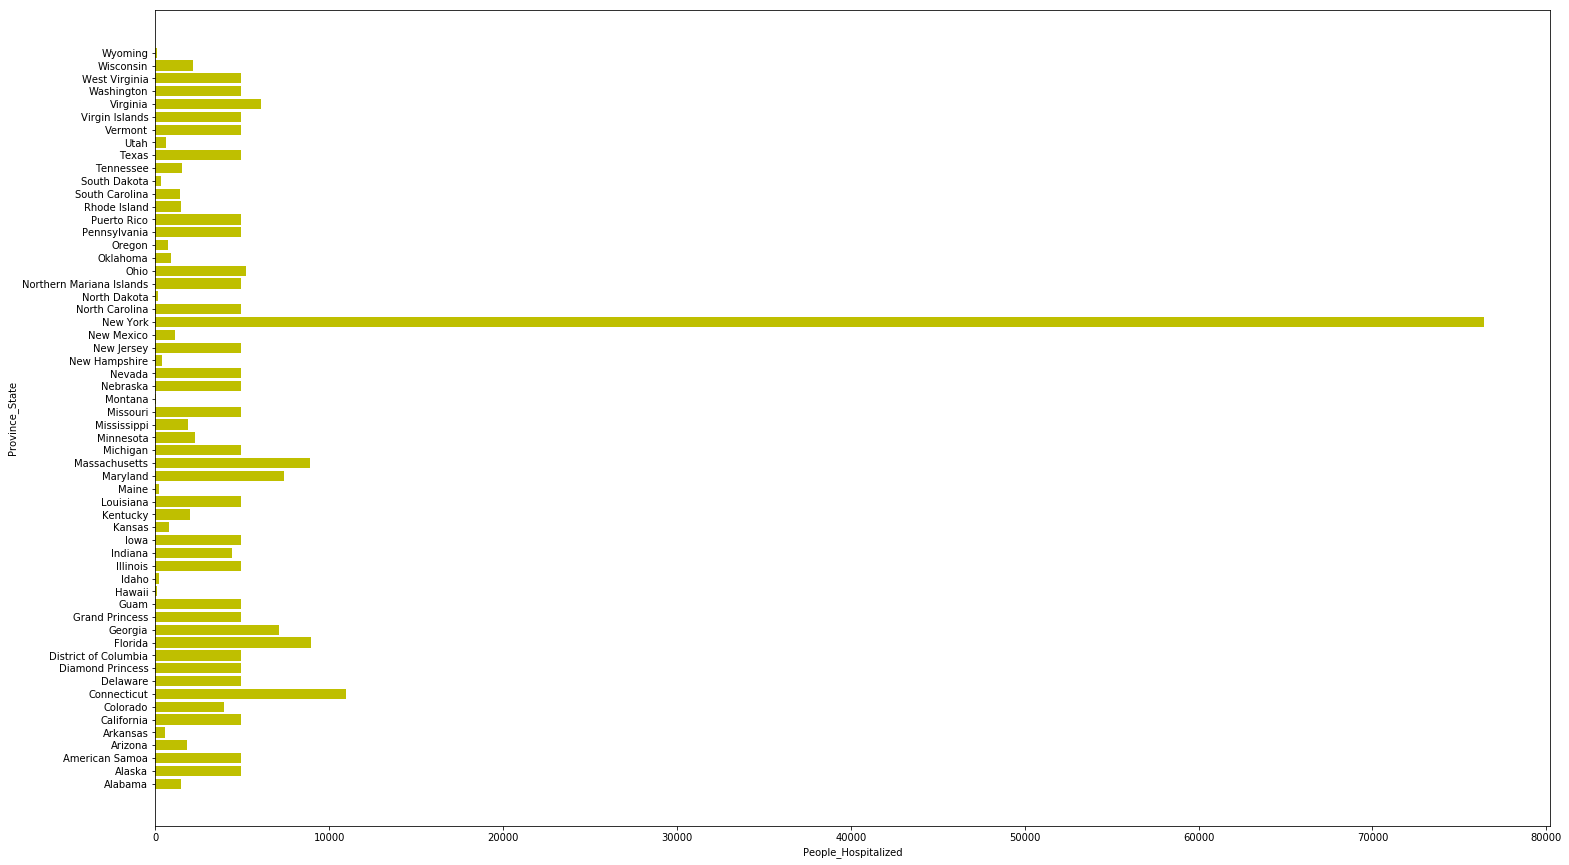

In [18]:
# PROVINCE_State v/s PEOPLE Hospitalized
plt.figure(figsize = (25, 15)) 
plt.xlabel('People_Hospitalized')
plt.ylabel('Province_State')
plt.barh(df['Province_State'],df['People_Hospitalized'],color='y')

# Clearly we can see that 'New York' is leading in numbers of 'People_Hospitalized'

In [19]:
df.describe()

,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,Testing_Rate,Hospitalization_Rate
count,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,5.800000e+01,58.000000,58.000000,5.800000e+01,58.000000,58.000000
mean,26756.086207,1611.017241,7007.428571,20070.724138,3288.086207,396.230806,2.258534e+05,4897.454545,4.458248,7.676194e+07,3894.186870,14.342541
std,52562.031122,4084.750891,9901.304545,41294.705318,17408.350591,395.554852,2.934948e+05,9879.577790,2.116191,2.378302e+07,1898.951207,3.781861
min,0.000000,0.000000,13.000000,0.000000,1.000000,0.000000,1.240000e+02,65.000000,0.000000,1.600000e+01,97.702058,6.778043
25%,2596.000000,74.000000,1281.750000,812.500000,18.250000,154.909239,4.745000e+04,1454.500000,3.116158,8.400001e+07,2741.843521,12.829963
50%,10148.500000,385.000000,4987.000000,5644.500000,32.500000,259.009335,1.433085e+05,4897.454545,4.409323,8.400003e+07,3501.526835,14.342541
75%,29395.500000,1394.250000,7007.428571,19291.250000,47.750000,462.828082,2.646656e+05,4897.454545,5.450908,8.400004e+07,4622.586404,15.552021
max,354370.000000,28636.000000,61886.000000,263848.000000,99999.000000,1821.620216,1.505836e+06,76410.000000,9.545549,8.410000e+07,11377.424693,28.054438


-->'Confirmed' is having highest Std.Deviation among all other features.                  
-->Average 'Deaths' cases are 1161.                                      
-->Average 'Recovered' cases are 7007.                                        
-->Average No. of 'Active' cases are 20,070.

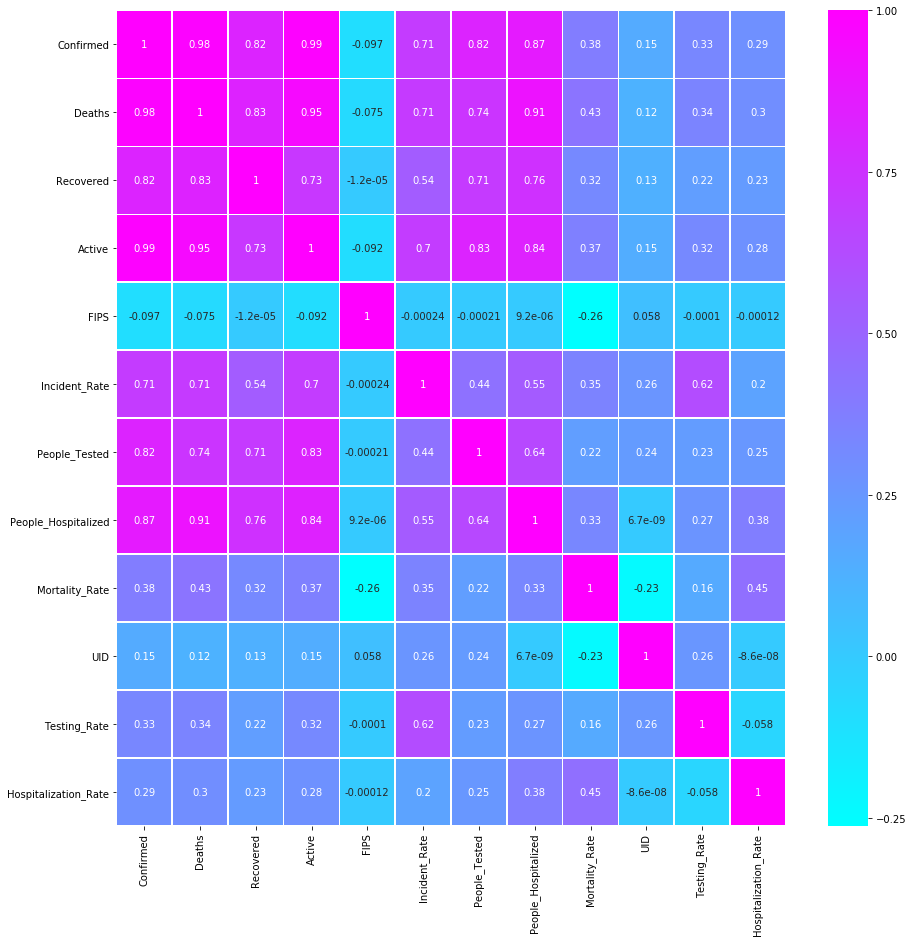

In [20]:
plt.figure(figsize = (15,15))
sns.heatmap(df.corr(),annot=True,cmap='cool',lw=0.5)

# 'Deaths' is having +ve correlation with 'Confirmed'cases,'Recovered' cases,'active' cases,'Incident_rate','People_Tested' & 'People_Hospitalised'.

# 'Deaths' is having -ve correlation with 'FIPS'.

In [21]:
#Checking for skewness & removing it.
df.skew()

Confirmed               4.708614
Deaths                  5.489201
Recovered               3.647693
Active                  4.180953
FIPS                    5.269070
Incident_Rate           1.988351
People_Tested           2.829700
People_Hospitalized     6.869437
Mortality_Rate          0.496115
UID                    -3.027480
Testing_Rate            1.313407
Hospitalization_Rate    0.867341
dtype: float64

In [22]:
df.drop(['Country_Region','UID','Last_Update','ISO3'],axis=1,inplace=True)

# We have dropped 4 columns, as they are not relevant for our analysis.

In [23]:
df.head()

,Province_State,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,Testing_Rate,Hospitalization_Rate
0,Alabama,13052,522,7007.428571,12530.0,1,266.194321,164450.0,1493.000000,3.999387,3353.942386,11.438860
1,Alaska,401,10,352.000000,39.0,2,54.815493,37045.0,4897.454545,2.493766,5063.940017,14.342541
2,American Samoa,0,0,7007.428571,0.0,60,0.000000,124.0,4897.454545,4.458248,222.857246,14.342541
3,Arizona,14906,747,3773.000000,10386.0,4,204.788838,165435.0,1792.000000,5.011405,2272.859351,12.022005
4,Arkansas,5003,107,3852.000000,1044.0,5,165.782801,96258.0,535.000000,2.138717,3189.670370,10.693584


In [24]:
# Converting CATEGORICAL DATA into Numeric
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Province_State'] = le.fit_transform(df['Province_State'])

In [25]:
df.head()

,Province_State,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,Testing_Rate,Hospitalization_Rate
0,0,13052,522,7007.428571,12530.0,1,266.194321,164450.0,1493.000000,3.999387,3353.942386,11.438860
1,1,401,10,352.000000,39.0,2,54.815493,37045.0,4897.454545,2.493766,5063.940017,14.342541
2,2,0,0,7007.428571,0.0,60,0.000000,124.0,4897.454545,4.458248,222.857246,14.342541
3,3,14906,747,3773.000000,10386.0,4,204.788838,165435.0,1792.000000,5.011405,2272.859351,12.022005
4,4,5003,107,3852.000000,1044.0,5,165.782801,96258.0,535.000000,2.138717,3189.670370,10.693584


In [26]:
for column in df.columns:
    df[column].replace(0,df[column].mean(axis=0),inplace=True)

In [27]:
from scipy.stats import boxcox
list=['Confirmed','Recovered','Active','FIPS','Incident_Rate','People_Tested','People_Hospitalized','Testing_Rate']
for i in list:
    df[i],lambd=boxcox(df[i])

In [28]:
df.skew()

Province_State          0.001628
Confirmed              -0.028434
Deaths                  5.495889
Recovered               0.013146
Active                 -0.078750
FIPS                   -0.450513
Incident_Rate          -0.001589
People_Tested           0.019126
People_Hospitalized     0.102885
Mortality_Rate          0.636103
Testing_Rate            0.225093
Hospitalization_Rate    0.867341
dtype: float64

# Therefore we have successfully removed skewness from our DATA.

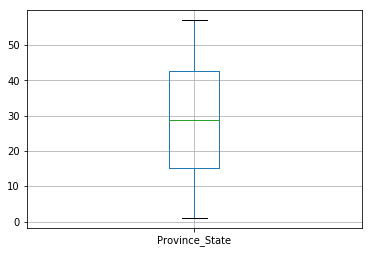

In [29]:
#Checking for OUTLIERS
df.boxplot('Province_State')

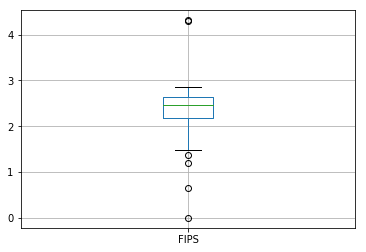

In [30]:
#Checking for OUTLIERS
df.boxplot('FIPS')

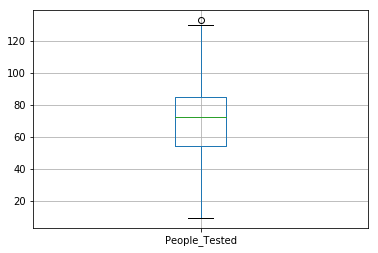

In [31]:
#Checking for OUTLIERS
df.boxplot('People_Tested')

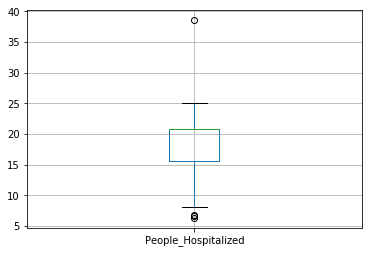

In [32]:
#Checking for OUTLIERS
df.boxplot('People_Hospitalized')

In [33]:
#NOW we will remove the OUTLIERS
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[3.01281587e-02, 1.52104997e-01, 2.83454066e-01, 4.60108452e-01,
        4.21164531e-01, 3.69955001e+00, 4.11101540e-02, 1.68186061e-01,
        4.68591810e-01, 2.66124351e-01, 2.00461084e-01, 7.74497410e-01],
       [1.71624792e+00, 1.39091320e+00, 4.10251499e-01, 1.40966727e+00,
        1.57018693e+00, 2.68761196e+00, 1.77834974e+00, 8.23525649e-01,
        4.84501950e-01, 1.01404697e+00, 6.85006327e-01, 4.73806709e-16],
       [1.65493447e+00, 5.95350924e-01, 1.37576004e-02, 4.60108452e-01,
        6.72967370e-01, 5.99719472e-01, 4.05520294e-01, 2.50237453e+00,
        4.84501950e-01, 3.81836194e-02, 2.66616990e+00, 4.73806709e-16],
       [1.59362103e+00, 2.30230090e-01, 2.27732538e-01, 2.95741187e-02,
        3.25720368e-01, 1.81367226e+00, 3.33495364e-01, 1.72941988e-01,
        3.35563767e-01, 2.36598919e-01, 8.51700617e-01, 6.18955558e-01],
       [1.53230758e+00, 3.64064860e-01, 3.86229329e-01, 1.42015482e-02,
        6.48648195e-01, 1.55851580e+00, 5.67887254e-01, 2.30

In [34]:
threshold=3
print(np.where(z>3))

(array([ 0,  7,  9, 13, 36, 36, 45], dtype=int64), array([ 5, 11,  5,  5,  2,  8, 10], dtype=int64))


In [35]:
df_new=df[(z<3).all(axis=1)]
print(df.shape)
print(df_new.shape)

(58, 12)
(52, 12)


# Therefore we have removed OUTLIERS

In [36]:
df=df_new

In [37]:
#Segregating the data for Model Training
df_x=df.drop('Deaths',axis=1)
y=df['Deaths']
print(df_x.shape)
print(y.shape)

(52, 11)
(52,)


In [38]:
#Scaling the Input
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)

In [39]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30)

In [40]:
print('x_train:',x_train.shape)
print('y_train:',y_train.shape)
print('x_test:',x_test.shape)
print('y_test:',y_test.shape)

x_train: (36, 11)
y_train: (36,)
x_test: (16, 11)
y_test: (16,)


In [41]:
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso,Ridge,ElasticNet
from sklearn.tree import DecisionTreeRegressor

In [42]:
#Selecting the best algorithm for our dataset
from sklearn.model_selection import cross_val_score
model=[LinearRegression(),SVR(),KNeighborsRegressor(),Ridge(),Lasso(),ElasticNet(),DecisionTreeRegressor()]
for m in model:
    score=cross_val_score(m,x,y,cv=4,scoring='r2')
    print("Score of",m,"is:")
    print('Score:',score)
    print('Mean Score:',score.mean())
    print('standard deviation:',score.std())
    print('\n')

Score of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False) is:
Score: [-5.12467031  0.8125196   0.5426434  -5.33443483]
Mean Score: -2.275985534495201
standard deviation: 2.9560383141424174


Score of SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False) is:
Score: [-0.2681855  -0.69865845 -0.13663137  0.00887622]
Mean Score: -0.27364977595784845
standard deviation: 0.26422396550483396




C:\Users\RK\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\RK\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\RK\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\RK\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The defa

Score of KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform') is:
Score: [0.69370538 0.81940717 0.54135171 0.23076622]
Mean Score: 0.571307619073925
standard deviation: 0.21988656025313066


Score of Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001) is:
Score: [-3.67500173  0.79186849  0.52181559 -3.82255527]
Mean Score: -1.5459682288455696
standard deviation: 2.205495560783877


Score of Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False) is:
Score: [-5.37983987  0.81298016  0.54192011 -5.2497088 ]
Mean Score: -2.318662099982985
standard deviation: 2.997997577037211


Score of ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1

# Therefore we will use Kneighbor Regressor as it is having highest mean score i.e,57

In [43]:
#Now we will find the best parameters for our model
from sklearn.model_selection import GridSearchCV
knn=KNeighborsRegressor()
parameters={'n_neighbors':[1,3,5,7,9,11,13,15],'algorithm':['auto','ball_tree','kd_tree','brute']}
clf=GridSearchCV(knn,parameters)
clf.fit(x,y)
clf.best_params_

C:\Users\RK\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\RK\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'algorithm': 'auto', 'n_neighbors': 9}

In [44]:
knn=KNeighborsRegressor(algorithm='auto', n_neighbors=9)

In [45]:
knn.fit(x_train,y_train)
knn.score(x_train,y_train)

0.6501182396206343

In [46]:
pred=knn.predict(x_test)

In [47]:
print('Mean Absolute error:',mean_absolute_error(y_test,pred))
print('Mean Square error:',mean_squared_error(y_test,pred))
print('R2 Score:',r2_score(y_test,pred))

Mean Absolute error: 419.58441091954023
Mean Square error: 360164.6890883959
R2 Score: 0.7374608777041922


In [49]:
#We will try ensemble technique to boost our model
from sklearn.ensemble import RandomForestRegressor

In [50]:
rf=RandomForestRegressor()

In [51]:
rf.fit(x_train,y_train)
print(rf.score(x_train,y_train))

0.9569004504949948


C:\Users\RK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [52]:
pred2=rf.predict(x_test)

In [53]:
print('Mean Absolute error:',mean_absolute_error(y_test,pred2))
print('Mean Square error:',mean_squared_error(y_test,pred2))
print('R2 Score:',r2_score(y_test,pred2))

Mean Absolute error: 257.2260775862069
Mean Square error: 366083.14277719986
R2 Score: 0.733146668999447


# Now we will save the best model that is KNeighboursRegressor as it having R2 score: 73.7

In [54]:
#SAVING OUR BEST MODEL
from sklearn.externals import joblib
joblib.dump(knn,'Covid19_dailyreport_us.pkl')

['Covid19_dailyreport_us.pkl']